# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model  import LinearRegression

# Notebook Presentation

In [21]:
pd.options.display.float_format = '{:.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [5]:
data.shape

(5391, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [9]:
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [12]:
data.duplicated().sum()

0

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [13]:
data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$','').str.replace(',','')
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.USD_Production_Budget.dtype

dtype('int64')

In [14]:
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(str).str.replace('$','').str.replace(',','')
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)
data.USD_Worldwide_Gross.dtype

dtype('int64')

In [15]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(str).str.replace('$','').str.replace(',','')
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
data.USD_Domestic_Gross.dtype

dtype('int64')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [18]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.Release_Date.dtype

dtype('<M8[ns]')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [26]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


The average film costs about 31m dollars to make and makes around 3x that (or ~89m dollars) in worldwide revenue. So that's encouraging.

But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is 5 million dollars and they only bring in 3.8m dolllars in worldwide revenue!

The minimum domestic and worldwide revenue is 0 dollar. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

On the other hand, the highest production budget was 425,000,000 dollars and the highest worldwide revenue was 2,783,918,982 dollars. 2.7 Billion dollars revenue!

In [43]:
# Lowest budget film
data.loc[data.USD_Production_Budget.idxmin():data.USD_Production_Budget.idxmin()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [44]:
# Highest budget film
data.loc[data.USD_Production_Budget.idxmax():data.USD_Production_Budget.idxmax()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [55]:
f'{data[data.USD_Domestic_Gross == 0].USD_Domestic_Gross.count()} films grossed $0 domestically.'

'512 films grossed $0 domestically.'

In [56]:
data[data.USD_Domestic_Gross == 0].sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [58]:
print(f'{data[data.USD_Worldwide_Gross == 0].USD_Worldwide_Gross.count()} films grossed $0 internationally.')
data[data.USD_Worldwide_Gross == 0].sort_values('USD_Production_Budget', ascending=False)

357 films grossed $0 internationally.


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [61]:
international_releases = data.loc[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [67]:
international_releases = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [68]:
print(f'Number of international releases: {len(international_releases)}')

Number of international releases: 155


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [69]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [72]:
not_released_movies = data.loc[data.Release_Date > scrape_date]
not_released_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [73]:
print(f'Number of movies not released before May 1st 2018: {len(not_released_movies)}')

Number of movies not released before May 1st 2018: 7


In [74]:
data_clean = data[data.Release_Date <= scrape_date]

In [75]:
len(data_clean)

5384

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [78]:
lost_money_percent = len(data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]) / len(data_clean)
print(f'{"{:.2f}".format(100 * lost_money_percent)}% of the movies lost money.')

37.28% of the movies lost money.


# Seaborn for Data Viz: Bubble Charts

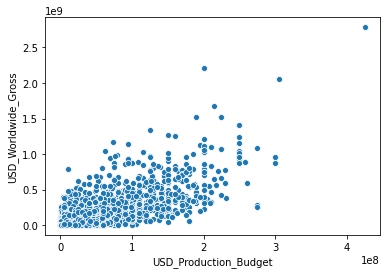

In [81]:
sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

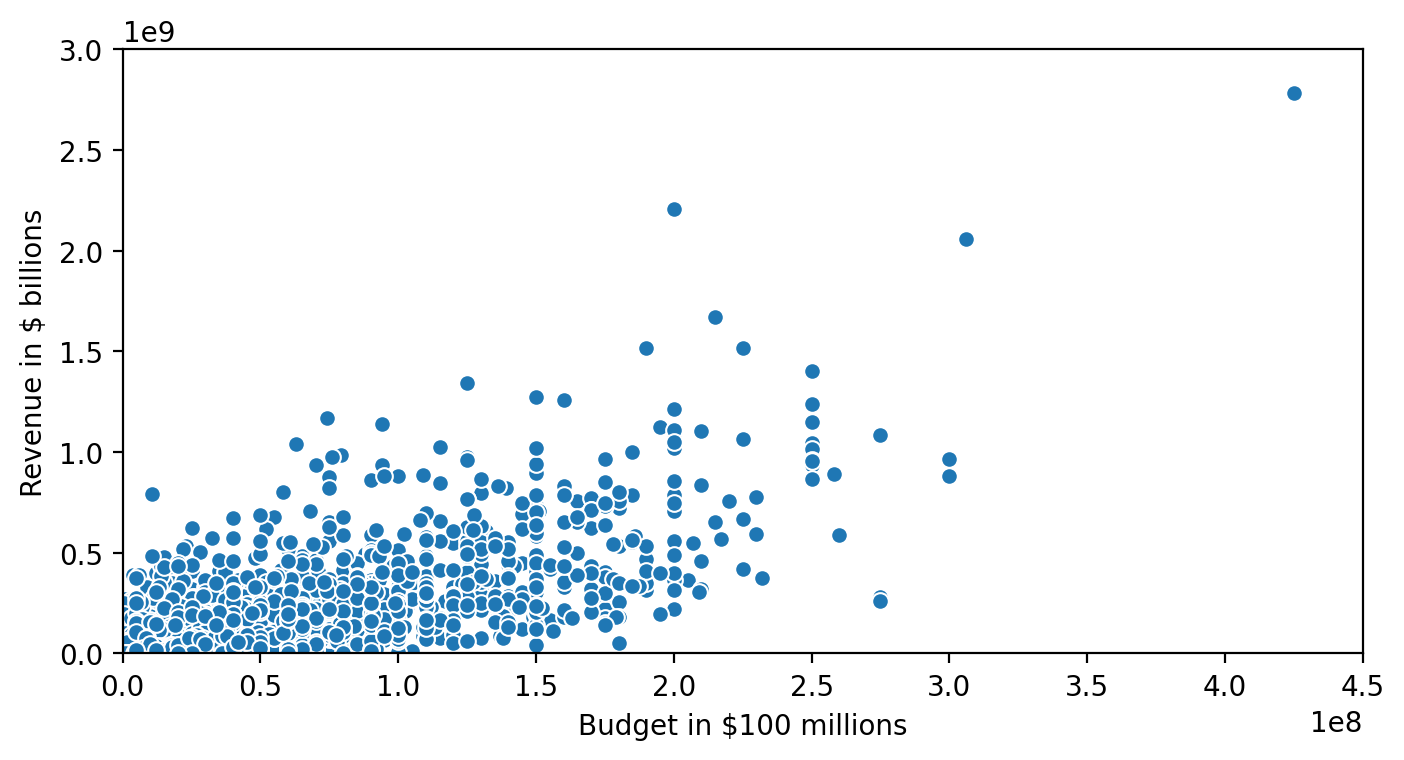

In [84]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



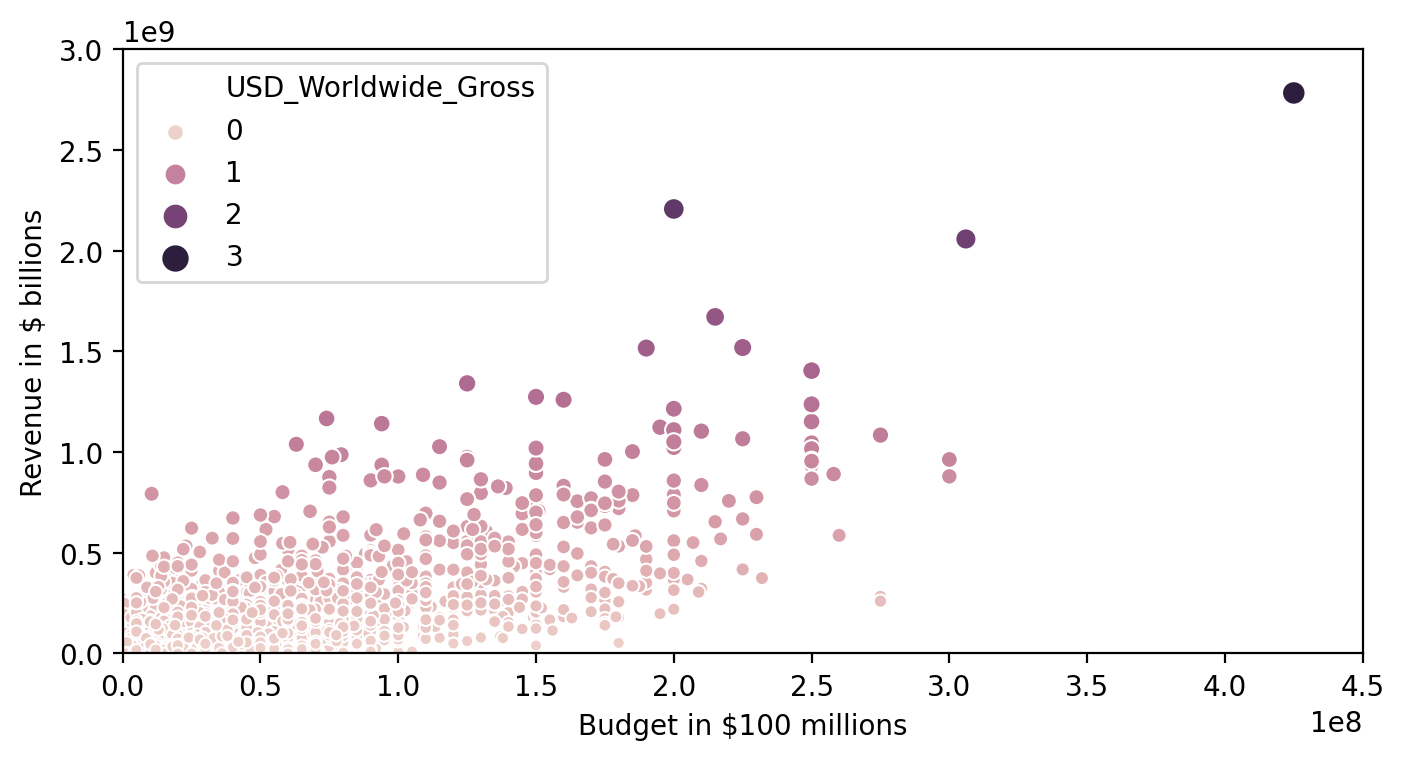

In [86]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.scatterplot(data=data_clean, 
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross', 
                     hue='USD_Worldwide_Gross',
                     size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

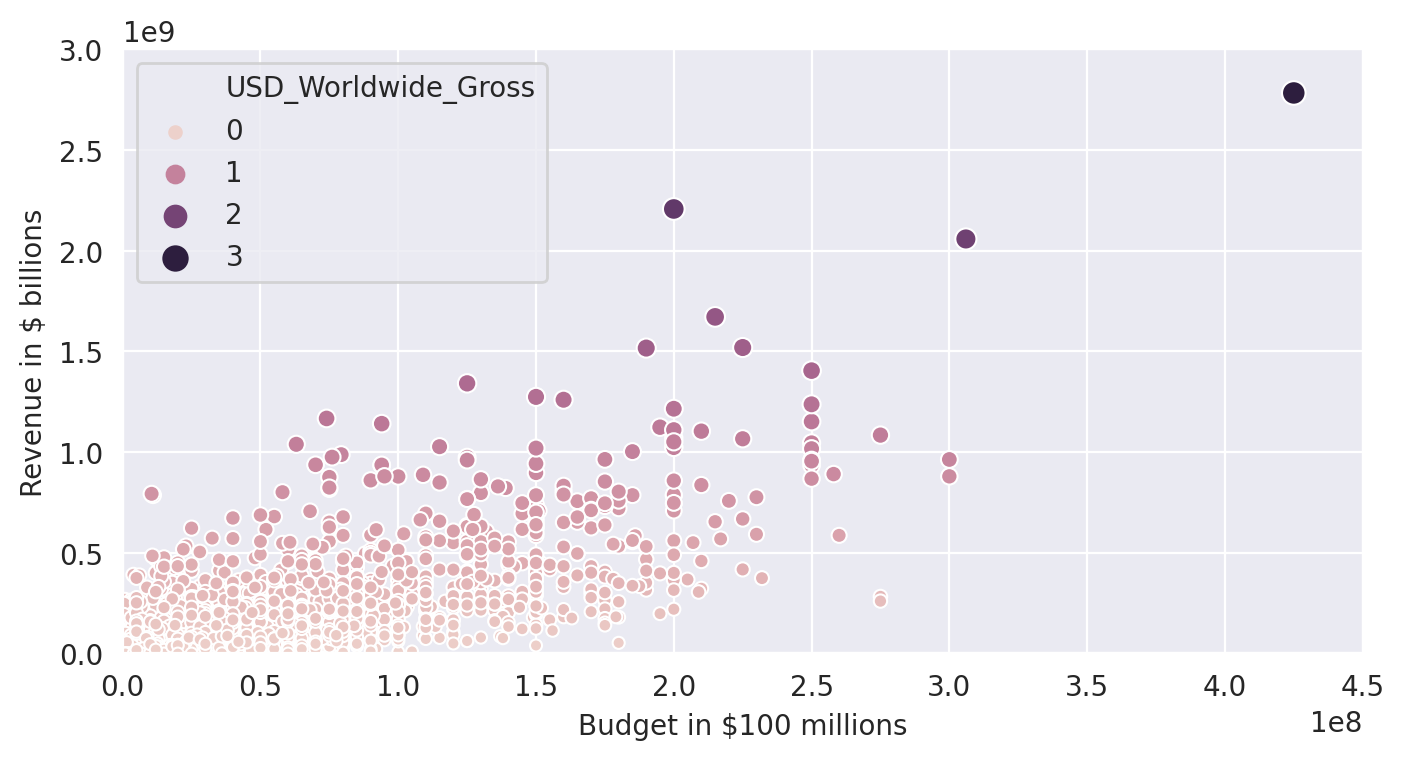

In [91]:
plt.figure(figsize=(8, 4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, 
                         x='USD_Production_Budget', 
                         y='USD_Worldwide_Gross', 
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions')
plt.show()

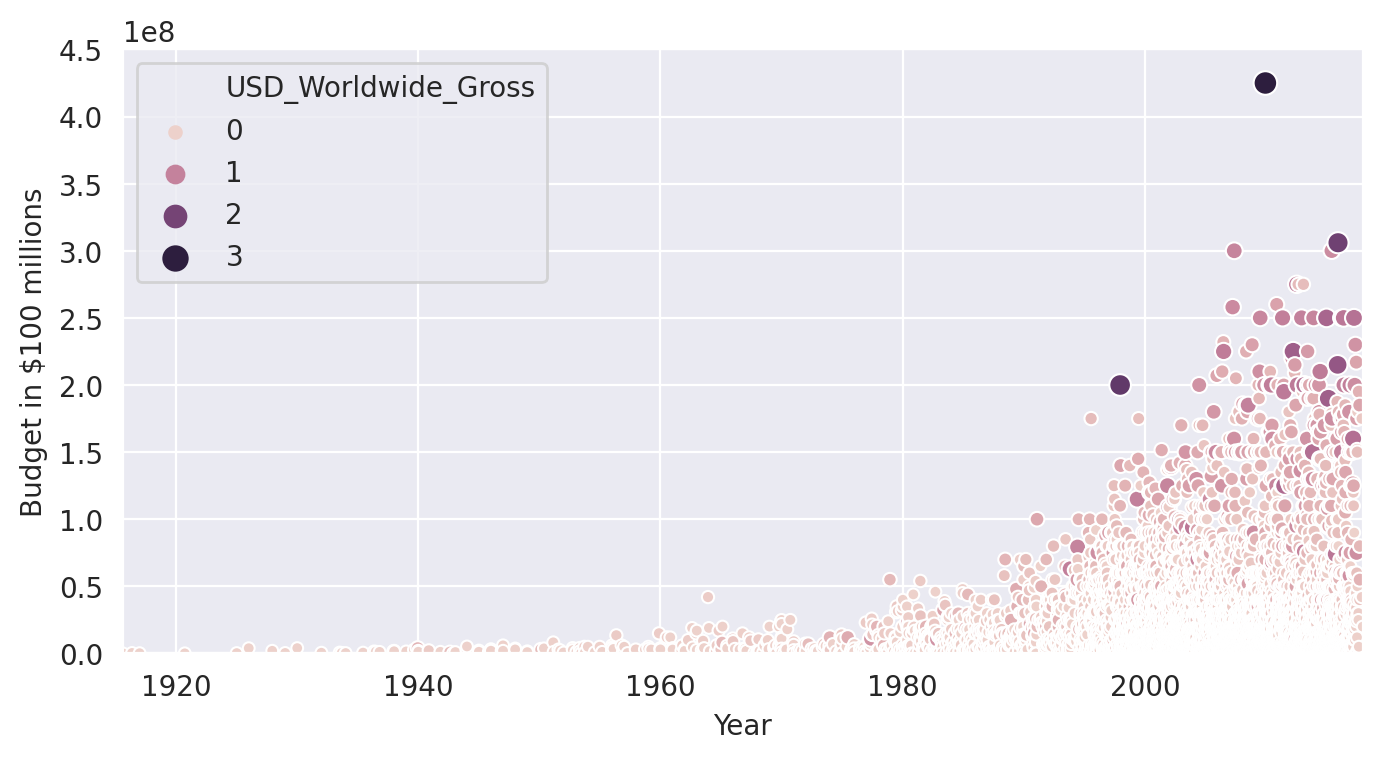

In [98]:
plt.figure(figsize=(8, 4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean, 
                         x='Release_Date', 
                         y='USD_Production_Budget', 
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')

    ax.set(xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           ylim=(0, 450000000),
           ylabel='Budget in $100 millions',
           xlabel='Year')
plt.show()

What do we see here? What is this chart telling us? Well, first off, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [100]:
release_dates = pd.DatetimeIndex(data_clean.Release_Date)
release_dates

DatetimeIndex(['1915-08-02', '1916-05-09', '1916-12-24', '1920-09-17',
               '1925-01-01', '1925-12-30', '1927-12-08', '1929-01-02',
               '1930-01-01', '1931-12-31',
               ...
               '2017-08-25', '2017-09-06', '2017-09-06', '2017-10-02',
               '2017-10-02', '2017-10-02', '2017-10-03', '2017-12-05',
               '2017-12-05', '2017-12-31'],
              dtype='datetime64[ns]', name='Release_Date', length=5384, freq=None)

In [101]:
release_years = release_dates.year
release_years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [103]:
decades = release_years//10*10
decades

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)

In [104]:
data_clean['Decade'] = decades

<ipython-input-104-29a7c30e9f72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = decades


In [105]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [106]:
old_films = data_clean[data_clean.Decade < 1970]
new_films = data_clean[data_clean.Decade >= 1970]

In [108]:
print(f'{len(old_films)} movies were released before 1970.')

153 movies were released before 1970.


In [110]:
print(f'{old_films.loc[old_films.USD_Production_Budget.idxmax()].Movie_Title} was the most expensive film made prior to 1970 with ${old_films.USD_Production_Budget.max()}.')

Cleopatra was the most expensive film made prior to 1970 with $42000000.


# Seaborn Regression Plots

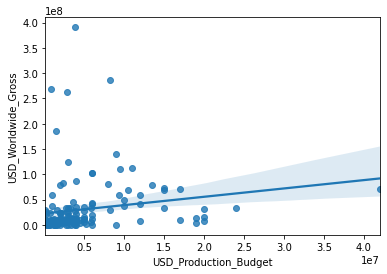

In [111]:
sns.regplot(data=old_films, x='USD_Production_Budget', y='USD_Worldwide_Gross')

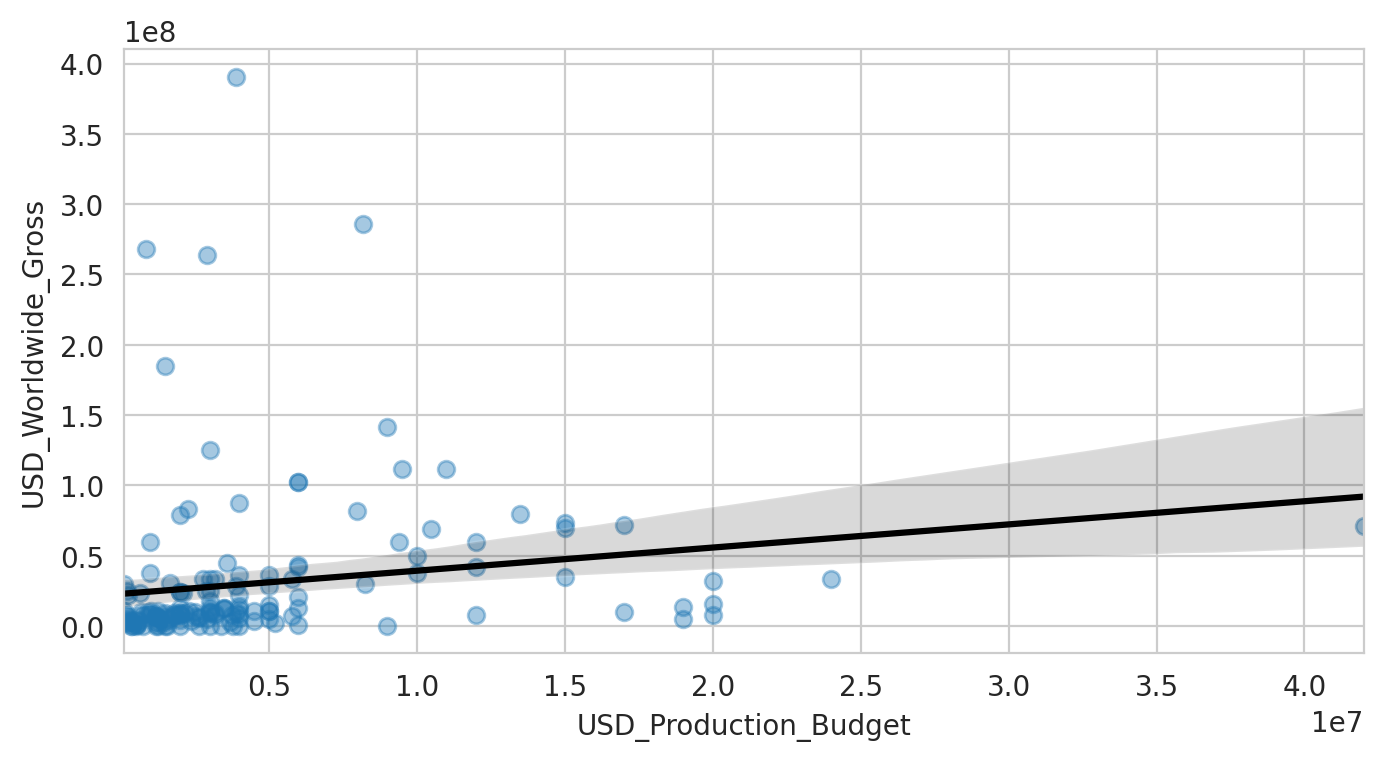

In [114]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

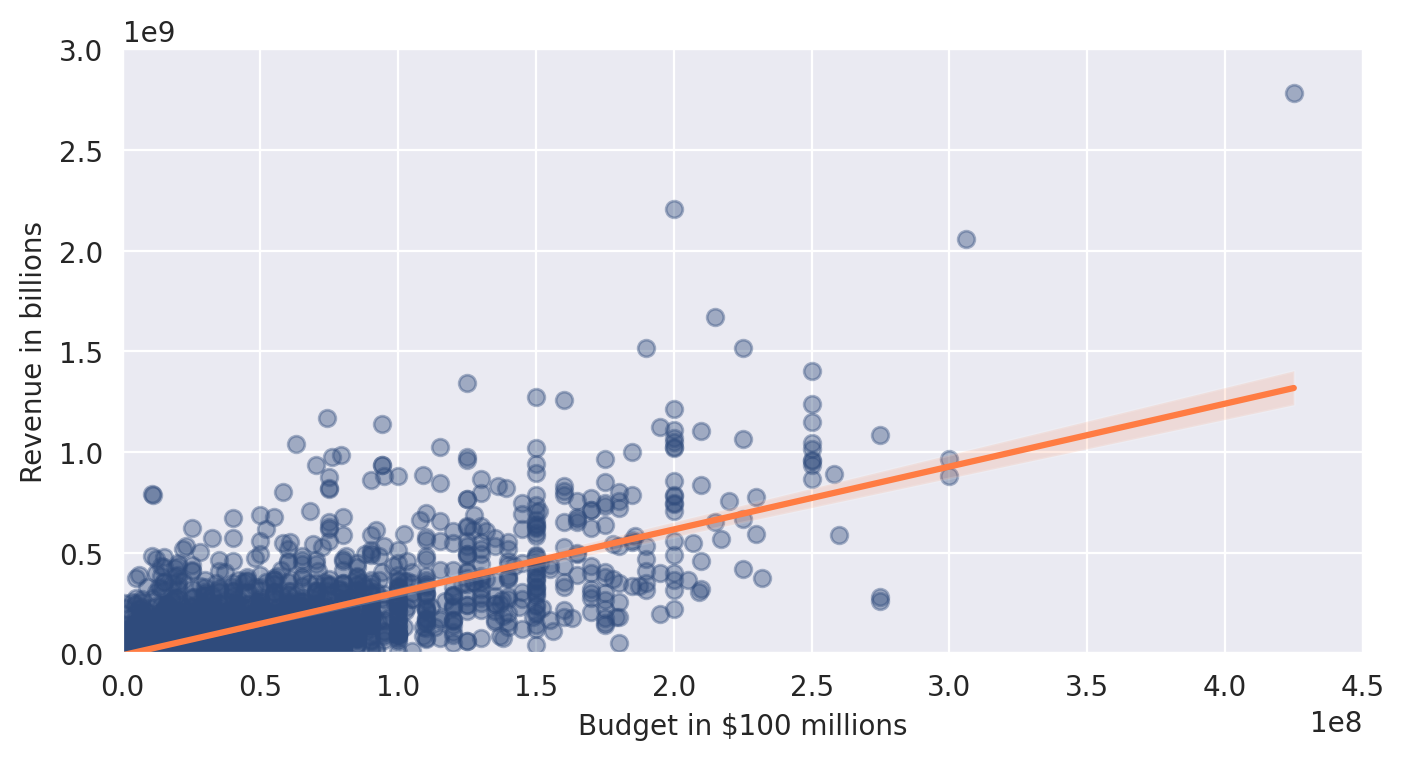

In [119]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross', 
                scatter_kws={'alpha': 0.4, 'color': '#2f4b7c'},
                line_kws={'color': '#ff7c43'})
    
    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in billions',
           xlabel='Budget in $100 millions')
plt.show()

This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line. Also, the confidence interval is much narrower. We also see that a film with a 150 million dollars budget is predicted to make slightly under 500 million dollars by our regression line.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [121]:
# Create linear regression model
lr = LinearRegression()

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [124]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films.USD_Production_Budget)
# Response Variable or Target
y = pd.DataFrame(new_films.USD_Worldwide_Gross)

In [125]:
# Find the best-fit line
lr.fit(X, y)

LinearRegression()

In [127]:
# y-intercept
lr.intercept_

array([-8650768.00661026])

In [128]:
# Coeff
lr.coef_

array([[3.12259592]])

In [129]:
# R-squared
lr.score(X, y)

0.5577032617720403

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [132]:
revenue = lr.intercept_ + lr.coef_ * 350000000
revenue[0][0]

1084257803.0557723

## Run Linear Regression on old movies

In [135]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films.USD_Production_Budget)
# Response Variable or Target
y = pd.DataFrame(old_films.USD_Worldwide_Gross)

#fit model
lr.fit(X, y)
# y-intercept
print(f'y-intercept is {lr.intercept_[0]}.')
# slope
print(f'slope is {lr.coef_[0][0]}.')
# R-squared
print(f'R-squared is {lr.score(X, y)}.')

y-intercept is 22821538.635080382.
slope is 1.647713144010732.
R-squared is 0.02937258620576877.


Barely 3% of the variance in the revenue of the old films is explained by this linear model.